In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings
import plotly.express as px

In [3]:
df=pd.read_csv(r"C:\Users\apurv\Downloads\AirPassengers.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.describe(include='all')  

,Month,#Passengers
count,144,144.000000
unique,144,NaN
top,1949-01,NaN
freq,1,NaN
mean,NaN,280.298611
std,NaN,119.966317
min,NaN,104.000000
25%,NaN,180.000000
50%,NaN,265.500000
75%,NaN,360.500000


In [8]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [19]:
dates=pd.date_range(start=df.Month.min(),freq="MS",periods=len(df))

In [20]:
df["start_date"]=dates

In [24]:
df['Mon_Year'] = df['start_date'].dt.strftime('%b-%Y')
df["Year"]=df["start_date"].dt.year
df["Month"]=df["start_date"].dt.month

In [28]:
df=df.rename(columns={"#Passengers":"passengers"})

In [31]:
print(df.columns)

Index(['Month', 'passengers', 'start_date', 'Mon_Year', 'Year'], dtype='object')


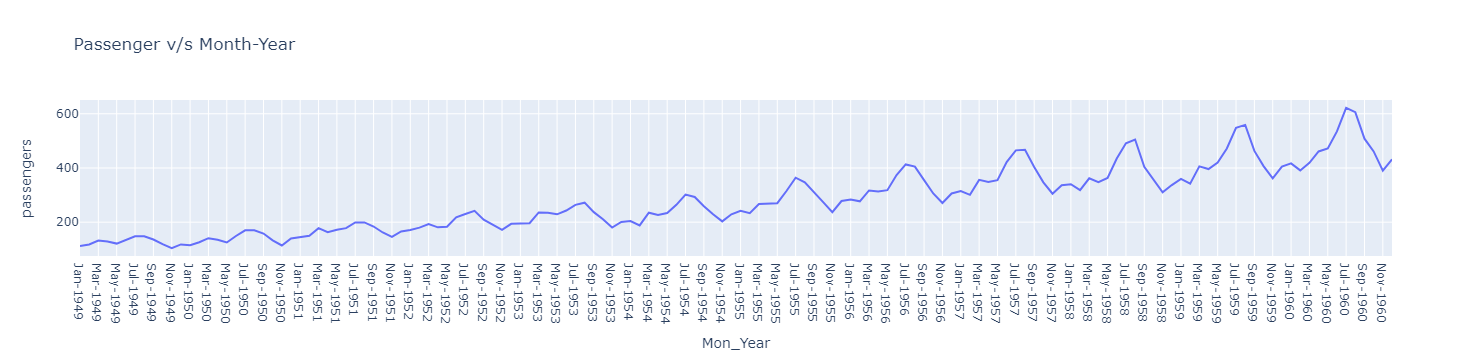

In [168]:
fig=px.line(df,y="passengers",x="Mon_Year",title="Passenger v/s Month-Year")
fig.show()

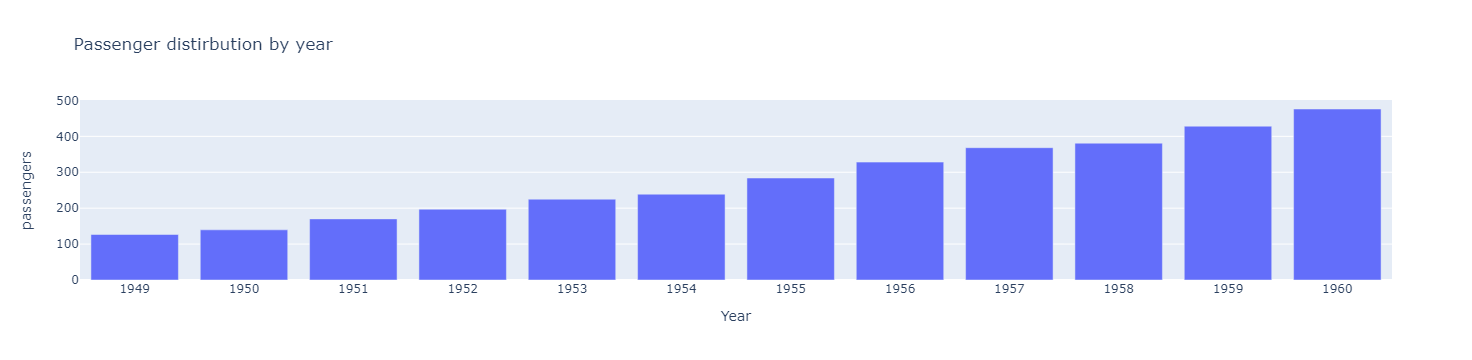

In [166]:
df_year=pd.DataFrame(df.groupby("Year")["passengers"].mean()).reset_index()
df_year.head()

fig=px.bar(df_year,x="Year",y="passengers",title="Passenger distirbution by year")
fig.update_xaxes(type='category')
fig.show()

In [53]:
df.passengers

start_date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: passengers, Length: 144, dtype: int64

In [52]:
df=df.set_index("start_date")

In [54]:
decompose = sm.tsa.seasonal_decompose(df.passengers,model='multiplicative',extrapolate_trend=8)

Text(0.5, 0.98, 'Decomposition of Time Series i.e Passenger Count over a period')

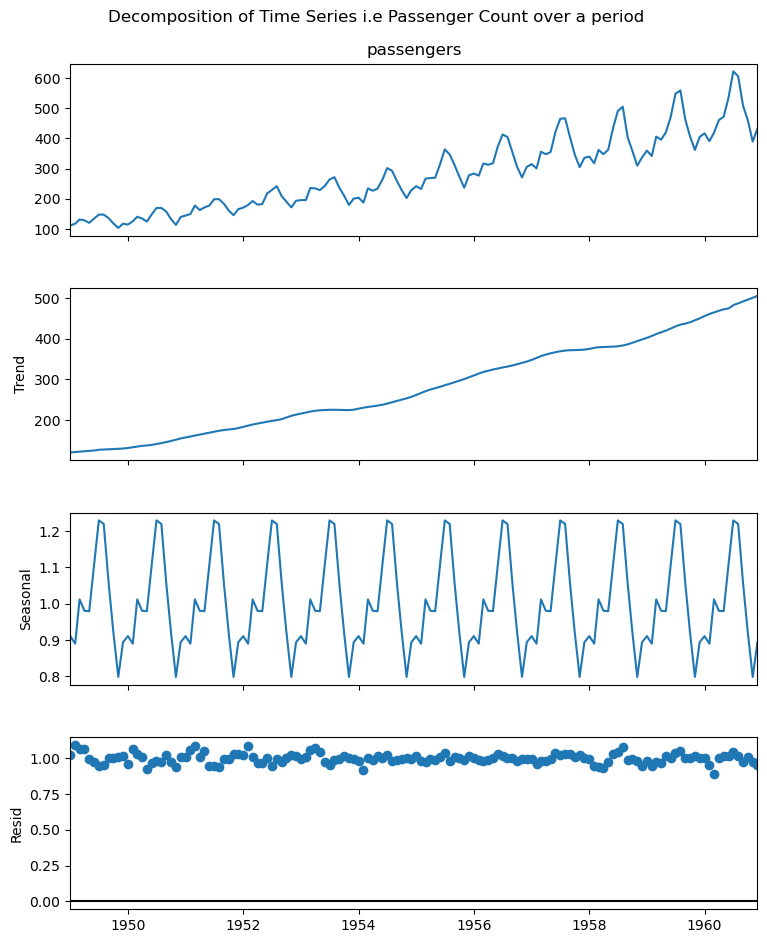

In [58]:
fig=decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series i.e Passenger Count over a period')

In [62]:
# Creating rolling avg periods for passenger count
df["pass_6"]=df.passengers.rolling(window=6).mean()
df["pass_8"]=df.passengers.rolling(window=8).mean()
df["pass_10"]=df.passengers.rolling(window=10).mean()
df["pass_12"]=df.passengers.rolling(window=12).mean()

In [63]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='start_date', length=144, freq=None)

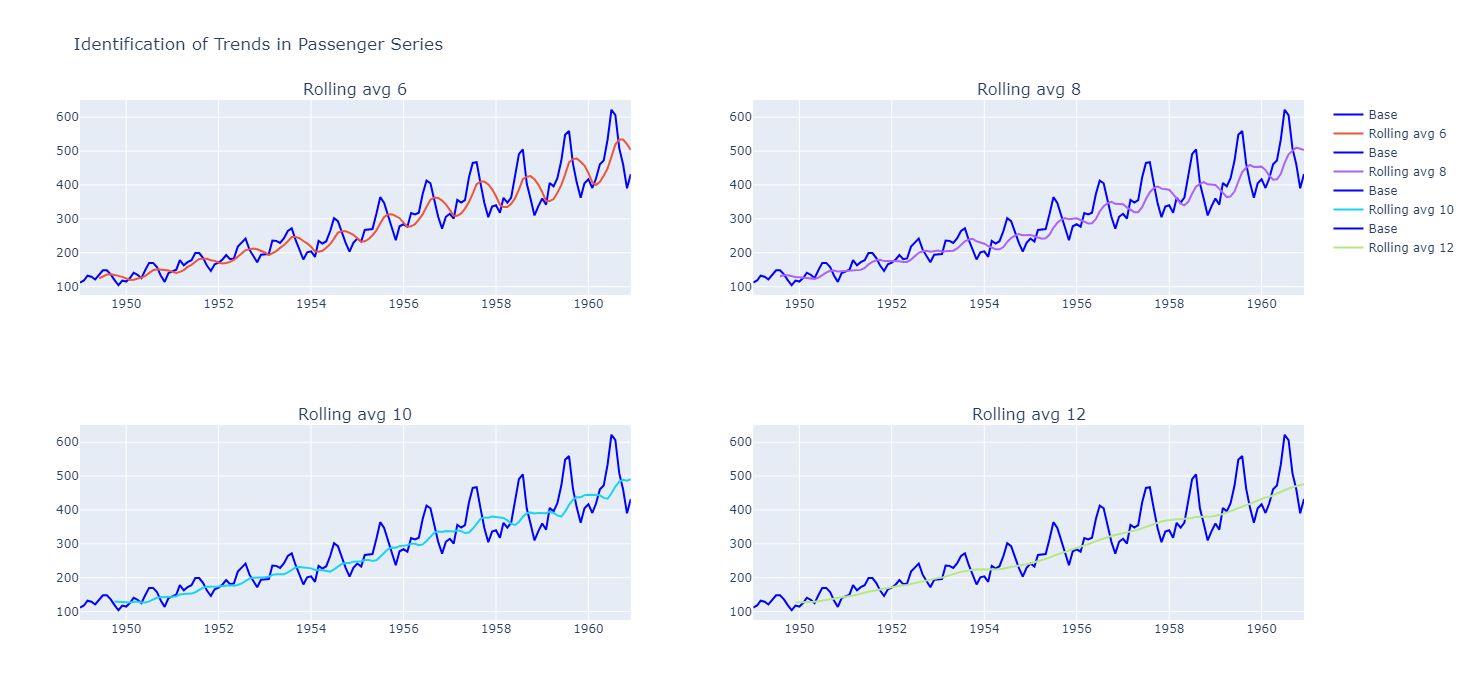

In [79]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=("Rolling avg 6", "Rolling avg 8", "Rolling avg 10", "Rolling avg 12"))

fig.add_trace(go.Scatter(x=df.index, y=df.passengers,name="Base",line=dict(color='blue')),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df.pass_6,name="Rolling avg 6"),
              row=1, col=1)


fig.add_trace(go.Scatter(x=df.index, y=df.passengers,name="Base",line=dict(color='blue')),
              row=1, col=2)
fig.add_trace(go.Scatter(x=df.index, y=df.pass_8,name="Rolling avg 8"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df.index, y=df.passengers,name="Base",line=dict(color='blue')),
              row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df.pass_10,name="Rolling avg 10"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df.passengers,name="Base",line=dict(color='blue')),
              row=2, col=2)
fig.add_trace(go.Scatter(x=df.index, y=df.pass_12,name="Rolling avg 12"),
              row=2, col=2)

fig.update_layout(height=700, width=1200,
                  title_text="Identification of Trends in Passenger Series")

fig.show()

In [84]:
passengers_count=df.passengers

In [101]:
# Utilizing adf test for identifying if the time series is stationary or not 
# If p-values <.05 that means its stationary
from statsmodels.tsa.stattools import adfuller
def calc_adf(dataf):
    adfuller_results = pd.Series(adfuller(dataf)[:4],index=['T stats','p-value','lags used','Number of observations'])
    for key,value in adfuller(dataf)[4].items():
        adfuller_results['Critical Value'+' '+ key] = value
    print(adfuller_results)

In [102]:
passengers_log = np.log10(passengers_count)
calc_adf(passengers_log)

T stats                    -1.717017
p-value                     0.422367
lags used                  13.000000
Number of observations    130.000000
Critical Value 1%          -3.481682
Critical Value 5%          -2.884042
Critical Value 10%         -2.578770
dtype: float64


In [90]:
diff1 = passengers_count.diff(1)

In [169]:
# print(passengers_count.head(15))
# print(diff1.head(15))


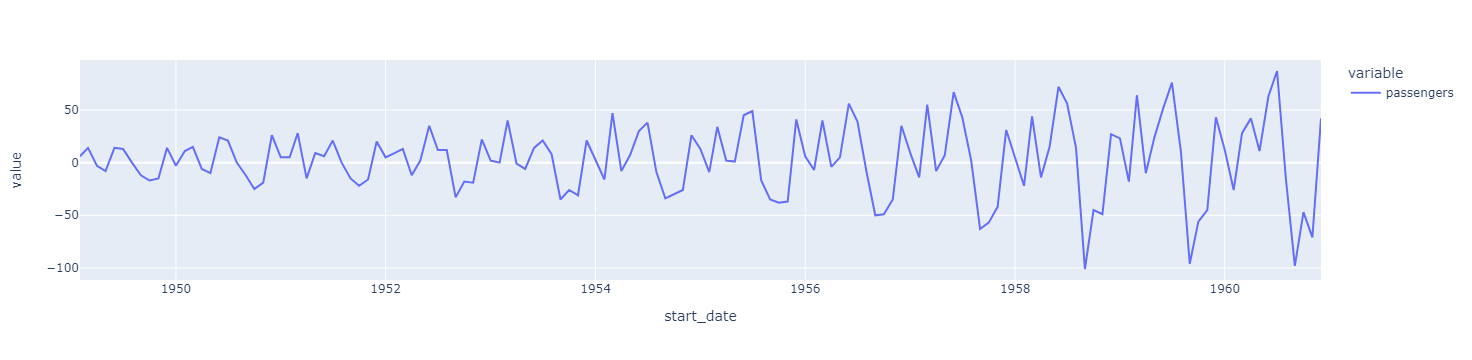

In [103]:
diff1.dropna(axis=0,inplace=True)
fig=px.line(diff1,title="Passenger count 1st diff v/s date)
fig.show()

In [107]:
calc_adf(diff1)


T stats                    -2.829267
p-value                     0.054213
lags used                  12.000000
Number of observations    130.000000
Critical Value 1%          -3.481682
Critical Value 5%          -2.884042
Critical Value 10%         -2.578770
dtype: float64


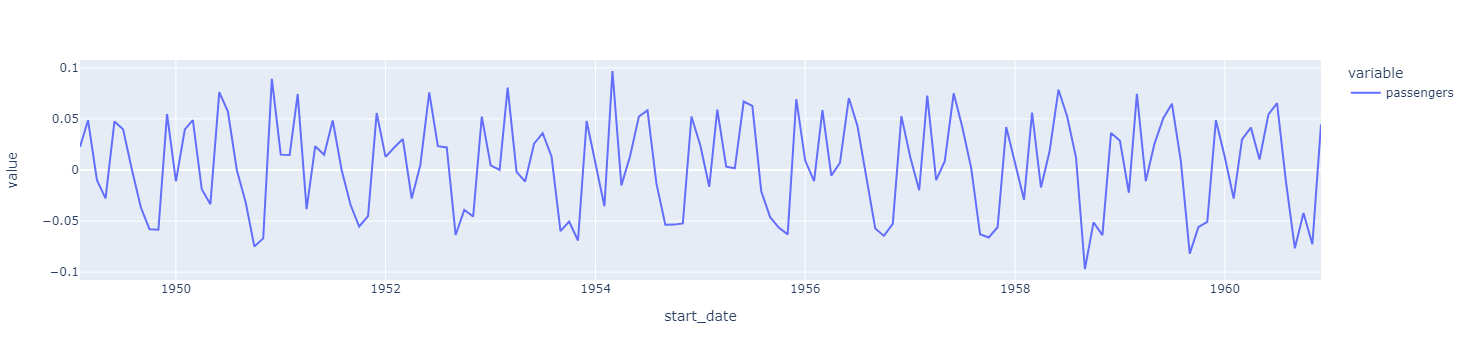

T stats                    -2.717131
p-value                     0.071121
lags used                  14.000000
Number of observations    128.000000
Critical Value 1%          -3.482501
Critical Value 5%          -2.884398
Critical Value 10%         -2.578960
dtype: float64


In [108]:
diff1_log=passengers_log.diff(1)
diff1_log.dropna(axis=0,inplace=True)
fig=px.line(diff1_log,title="log of 1st differentiation of passenger count v/s time")
fig.show()
calc_adf(diff1_log)


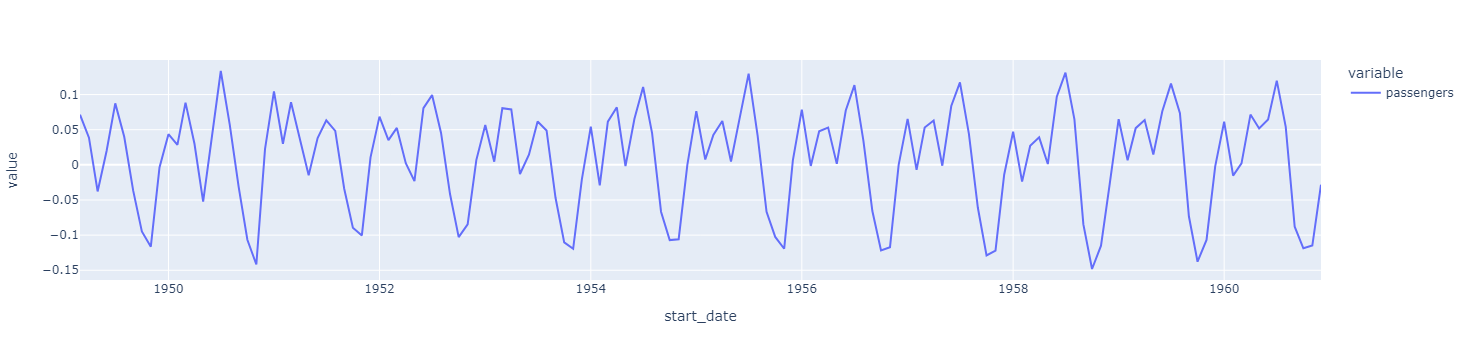

T stats                    -3.167907
p-value                     0.021919
lags used                  11.000000
Number of observations    130.000000
Critical Value 1%          -3.481682
Critical Value 5%          -2.884042
Critical Value 10%         -2.578770
dtype: float64


In [110]:
diff1_log2=passengers_log.diff(2)
diff1_log2.dropna(axis=0,inplace=True)
fig=px.line(diff1_log2,title="Log of 2nd differentiation of passenger count v/s date")
fig.show()
calc_adf(diff1_log2)

In [115]:
D = range(0,3)
P = Q = range(0, 3) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [116]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [117]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0,1)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [120]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
# Trying out multiple values for parameters in order to find best performing parameters for the Sarimax model
for param in pdq:
    for param_seasonal in seasonal_pdq:
       
        try:
            temp_model = sm.tsa.statespace.SARIMAX(diff1_log2,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

           # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 model - AIC:-671.0373827991803


In [122]:
sarima = sm.tsa.statespace.SARIMAX(diff1_log2,order=(1,0,1),seasonal_order=(1,0,1,12),enforce_invertibility=False,enforce_stationarity=False)
sarima_results = sarima.fit()

In [123]:
prediction = sarima_results.get_prediction(start=pd.to_datetime('1960-01-01'),full_results=True)

In [148]:
predicted_values = prediction.predicted_mean
print(predicted_values)

1960-01-01    0.066248
1960-02-01   -0.008522
1960-03-01    0.043601
1960-04-01    0.030880
1960-05-01    0.041559
1960-06-01    0.075523
1960-07-01    0.114084
1960-08-01    0.067364
1960-09-01   -0.083157
1960-10-01   -0.134680
1960-11-01   -0.102463
1960-12-01   -0.021002
Freq: MS, Name: predicted_mean, dtype: float64


In [152]:
print(diff1_log2.tail(12))

start_date
1960-01-01    0.061427
1960-02-01   -0.015278
1960-03-01    0.002078
1960-04-01    0.071524
1960-05-01    0.051728
1960-06-01    0.064653
1960-07-01    0.119848
1960-08-01    0.054119
1960-09-01   -0.087927
1960-10-01   -0.118772
1960-11-01   -0.114799
1960-12-01   -0.028217
Name: passengers, dtype: float64


In [125]:
predicted_values = np.power(10,prediction.predicted_mean)

In [157]:
reversed_diff_values

1960-01-01    1.164790
1960-02-01    0.980569
1960-03-01    1.105608
1960-04-01    1.073693
1960-05-01    1.100421
1960-06-01    1.189933
1960-07-01    1.300422
1960-08-01    1.167787
1960-09-01    0.825739
1960-10-01    0.733365
1960-11-01    0.789836
1960-12-01    0.952792
Freq: MS, Name: predicted_mean, dtype: float64

In [155]:

# Reverse operations: Exponentiation and Integration
reversed_diff_values = np.power(10,predicted_values)
integrated_values = np.cumsum(np.cumsum(reversed_diff_values))

In [163]:
print("org",actual)
print("rev",reversed_diff_values)

org start_date
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: passengers, dtype: int64
rev 1960-01-01    1.164790
1960-02-01    0.980569
1960-03-01    1.105608
1960-04-01    1.073693
1960-05-01    1.100421
1960-06-01    1.189933
1960-07-01    1.300422
1960-08-01    1.167787
1960-09-01    0.825739
1960-10-01    0.733365
1960-11-01    0.789836
1960-12-01    0.952792
Freq: MS, Name: predicted_mean, dtype: float64


In [126]:
actual = passengers_count['1960-01-01':]

In [138]:
predicted_values.combine_first(actual)

1960-01-01    1.164790
1960-02-01    0.980569
1960-03-01    1.105608
1960-04-01    1.073693
1960-05-01    1.100421
1960-06-01    1.189933
1960-07-01    1.300422
1960-08-01    1.167787
1960-09-01    0.825739
1960-10-01    0.733365
1960-11-01    0.789836
1960-12-01    0.952792
Freq: MS, Name: predicted_mean, dtype: float64

In [140]:
actual

start_date
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: passengers, dtype: int64

In [127]:
pred_uc_99 = sarima_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = sarima_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [130]:
n_steps = 36
idx = pd.date_range(passengers_count.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])